In [167]:
# pandas used for data manipulation and analysis
import pandas as pd

In [168]:
medical_df = pd.read_csv('/content/insurance(Machine Learning dataset).csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [169]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [170]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [171]:
# plotly express is used for creating interactive plots and visualizations
# matplotlib is used for for creating static, interactive, and animated visualizations
# matplotlib.pyplot is a collection of functions that make Matplotlib work like MATLAB
# seaborn provides a high-level interface for drawing attractive statistical graphics
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
fig = px.histogram(
medical_df, x = 'age', marginal = 'box',
nbins = 47, title = 'Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()

In [173]:
fig = px.histogram(
medical_df, x = 'bmi', marginal = 'box', title  = 'Distribution of BMI')
fig.update_layout(bargap = 0.1)
fig.show()

In [174]:
fig = px.histogram(
medical_df, x = 'charges', marginal = 'box', color = 'smoker',
color_discrete_sequence = ['green', 'blue'],
title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [175]:
medical_df.smoker.value_counts()
px.histogram(medical_df, x = 'smoker', color = 'sex', title = 'smoker')

In [176]:
fig = px.scatter(
medical_df, x = 'age', y = 'charges', color = 'smoker',
opacity = 0.8, hover_data = ['sex'], title = 'Age vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [177]:
fig = px.scatter(
medical_df, x = 'bmi', y = 'charges', color = 'smoker',
opacity = 0.8, hover_data = ['sex'], title = 'BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [178]:
px.violin(medical_df, x='children', y='charges')

In [179]:
#correlation(relation between two variables)
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [180]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [181]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [182]:
medical_df.smoker

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


In [183]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [184]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [185]:
px.scatter(medical_df, x = 'age', y = 'age')

In [186]:
correlation_matrix = medical_df.corr(numeric_only=True)
display(correlation_matrix)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

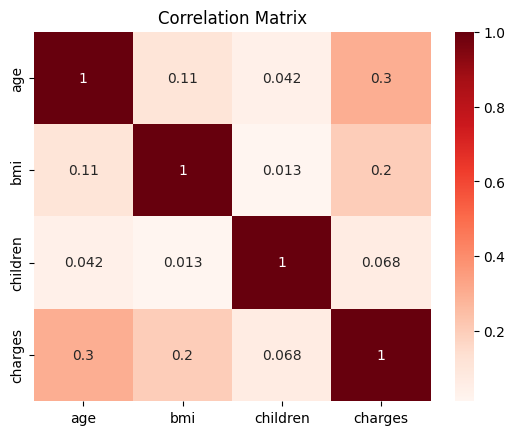

In [187]:
sns.heatmap(correlation_matrix, cmap = 'Reds', annot = True)
plt.title('Correlation Matrix')

In [188]:
# Linear Regrssion for Single Feature
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

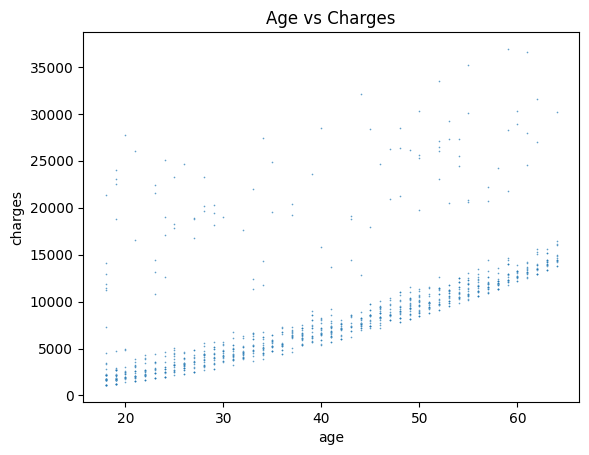

In [189]:
plt.title('Age vs Charges')
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 1.5)

In [190]:
def estimate_charges(age, w, b):
  return w * age + b

In [191]:
w = 50
b = 100

In [192]:
estimate_charges(40, w, b)

2100

In [193]:
ages = non_smoker_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [194]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [195]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


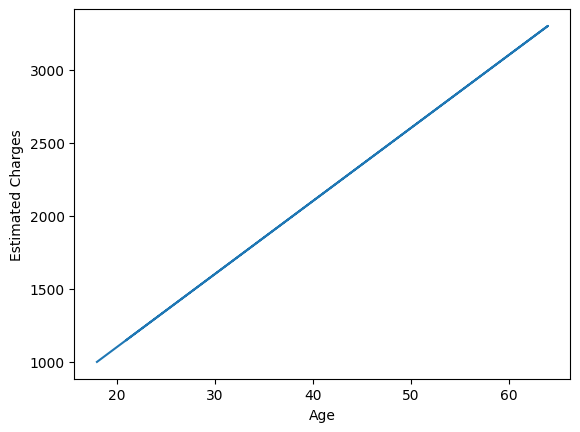

In [196]:
plt.plot(ages, estimated_charges);
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

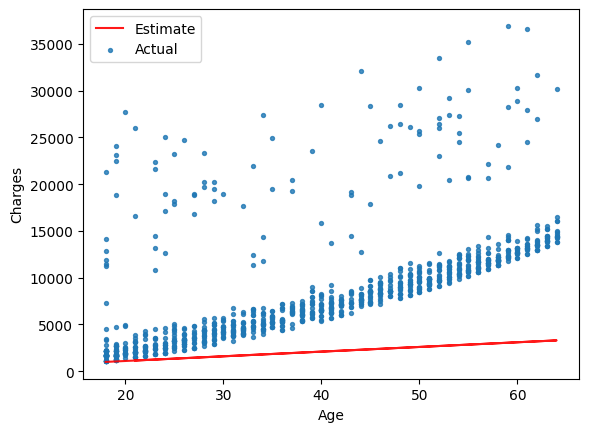

In [197]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate', 'Actual']);

In [198]:
#Here s belongs to size and r belongs to color red
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  estimated_charges = estimate_charges(ages, w, b)
  plt.plot(ages, estimated_charges, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8, alpha = 0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual']);

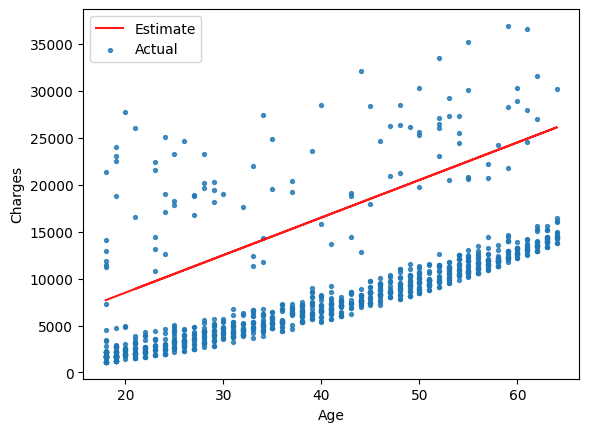

In [199]:
try_parameters(400, 500)

In [200]:
targets = non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [201]:
predictions = estimated_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [202]:
import numpy as np

In [203]:
# rmse function is used to calculate root mean square error between targets and predictions
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [204]:
w = 50
b = 100

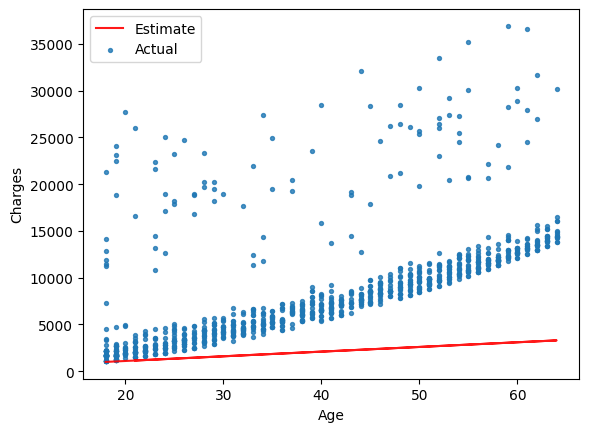

In [205]:
try_parameters(w,b)

In [206]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age,w,b)

In [207]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [208]:
def try_parameters(w ,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charges(ages, w, b)
  plt.plot(ages, predictions, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8, alpha = 0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Prediction', 'Actual']);
  loss = rmse(target, predictions)
  print("RMSE Loss:", loss)

RMSE Loss: 4991.993804156943


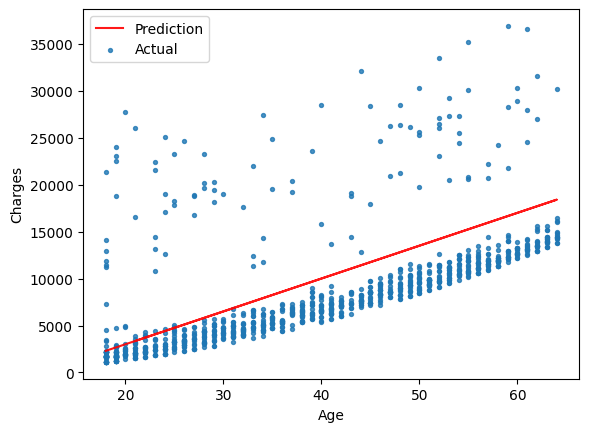

In [209]:
try_parameters(350, -4000)

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
model = LinearRegression()

In [212]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [213]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)

inputs.shape : (1064, 1)
targets.shape : (1064,)


In [214]:
model.fit(inputs, targets)

LinearRegression()

In [215]:
# predict the charges for the ages 23, 37, 61
model.predict(np.array([[23], [37], [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [216]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [217]:
# predictions for targets
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [218]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [219]:
# coefficient
model.coef_

array([267.24891283])

In [220]:
# Used to access the y-intercept of the linear regression model
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss: 4662.505766636395


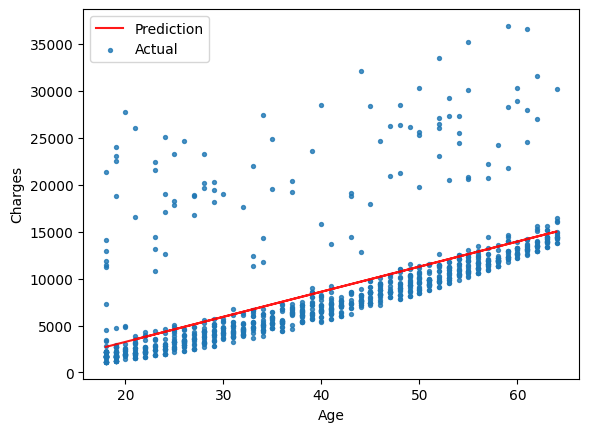

In [221]:
try_parameters(model.coef_, model.intercept_)

In [222]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
perdiction = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [223]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

In [224]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542192)

In [225]:
fig = px.strip(non_smoker_df, x = 'children', y = 'charges', title = 'Children vs Charges')
fig.update_traces(marker_size = 4, marker_opacity = 0.7)
fig.show()

In [226]:
fig = px.scatter(non_smoker_df, x = 'bmi', y = 'charges', title = 'BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [227]:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


In [228]:
px.scatter(medical_df, x='age', y='charges', color='smoker')

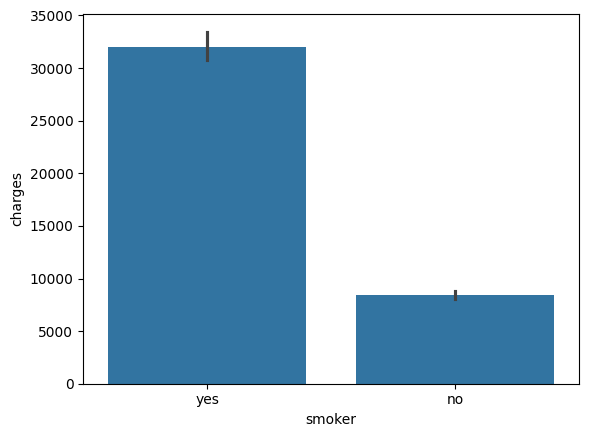

In [229]:
# Categorical Features for Machine Learning
sns.barplot(data = medical_df, x='smoker', y='charges');

In [230]:
smoker_code = {'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_code)
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [231]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [232]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

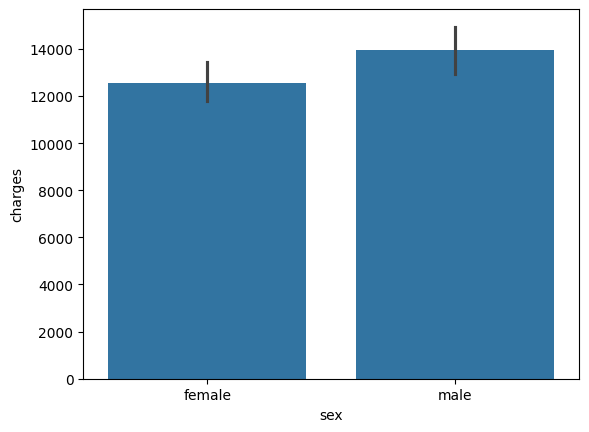

In [233]:
sns.barplot(data = medical_df, x='sex', y='charges')

In [234]:
sex_codes = {'female':0, 'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [235]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

In [236]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


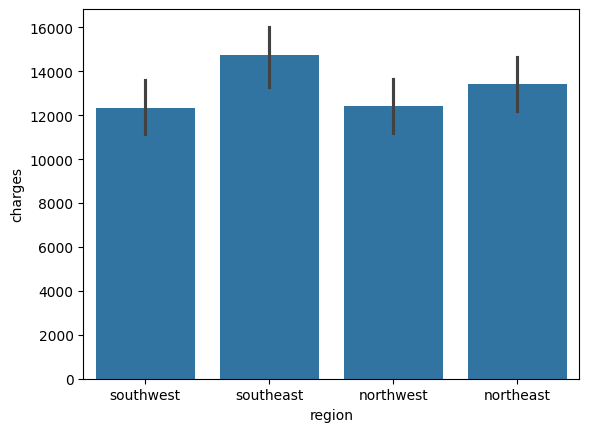

In [237]:
#one hot encoding
sns.barplot(data = medical_df, x = 'region', y = 'charges');

In [238]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [239]:
enc.transform([['northeast'],
               ['northwest']]).toarray()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [240]:
medical_df[['region']]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [241]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [242]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [243]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [244]:
medical_df[input_cols].loc[10]

,10
age,25.00
bmi,26.22
children,0.00
smoker_code,0.00
sex_code,1.00
northeast,1.00
northwest,0.00
southeast,0.00
southwest,0.00


In [245]:
#here 28 = age, 30 = bmi, 2 = children, 1 = smoker, 0 = sex(female), 0 = Northeast region, 1 = Northwest region, 0 = Southeast region, 0 = Southwest region
model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0.]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

In [246]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [247]:
model.intercept_

np.float64(-12525.547811195444)

In [248]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight' : np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [249]:
from sklearn.preprocessing import StandardScaler

In [250]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [251]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [252]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [254]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [255]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [258]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [261]:
inputs

,age,bmi,children,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,0,0.0,0.0,0.0,1.0


In [262]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)
targets = medical_df.charges
model = LinearRegression().fit(inputs, targets)
prediction = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [266]:
model.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [267]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending = False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [269]:
new_cusotmers = [[28,30,2,1,0,0,1,0,0.]]
scaler.transform([[28, 30, 2]])

array([[-0.79795355, -0.10882659,  0.75107928]])

In [270]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0.]])

array([29875.81463371])

In [275]:
# Test Set
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [278]:
model = LinearRegression().fit(inputs_train, targets_train)
prediction_test = model.predict(inputs_test)
loss = rmse(targets_test, prediction_test)
print('Test Loss:', loss)

Test Loss: 6183.111600061403


In [279]:
prediction_train = model.predict(inputs_train)
loss = rmse(targets_train, prediction_train)
print('Training Loss:', loss)

Training Loss: 6030.145438199254
